In [1]:
import pandas as pd
import textblob

reviews = pd.read_table("E://Yelp//Unfiltered data//YelpZip//reviewContent", header = None)
meta =pd.read_table("E://Yelp//Unfiltered data//YelpZip//metadata", header = None)

In [2]:
review = pd.merge(reviews, meta, on = [0,1], how="inner")
review.shape

(608458, 7)

In [3]:
review = review[['3_x', '3_y', '2_y']]
review.head()

,3_x,3_y,2_y
0,"Drinks were bad, the hot chocolate was watered...",-1,1.0
1,This was the worst experience I've ever had a ...,-1,1.0
2,This is located on the site of the old Spruce ...,-1,3.0
3,I enjoyed coffee and breakfast twice at Toast ...,-1,5.0
4,I love Toast! The food choices are fantastic -...,-1,5.0


In [4]:
review.head()

,3_x,3_y,2_y
0,"Drinks were bad, the hot chocolate was watered...",-1,1.0
1,This was the worst experience I've ever had a ...,-1,1.0
2,This is located on the site of the old Spruce ...,-1,3.0
3,I enjoyed coffee and breakfast twice at Toast ...,-1,5.0
4,I love Toast! The food choices are fantastic -...,-1,5.0


In [5]:
review.columns = ['review', 'real', 'rating']
review.head()

,review,real,rating
0,"Drinks were bad, the hot chocolate was watered...",-1,1.0
1,This was the worst experience I've ever had a ...,-1,1.0
2,This is located on the site of the old Spruce ...,-1,3.0
3,I enjoyed coffee and breakfast twice at Toast ...,-1,5.0
4,I love Toast! The food choices are fantastic -...,-1,5.0


In [ ]:
review.to_csv("E://Yelp//Unfiltered data//YelpZip//textonly", header = None)

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import base64
import string
import re
from collections import Counter
from time import time
from nltk.corpus import stopwords
from sklearn.metrics import log_loss
stopwords = stopwords.words('english')
sns.set_context('notebook')

In [8]:
from sklearn.model_selection import train_test_split

X = review[['review', 'rating']]
Y = review[['real']]

In [9]:
print(X.head())
print(X.info())

                                              review  rating
0  Drinks were bad, the hot chocolate was watered...     1.0
1  This was the worst experience I've ever had a ...     1.0
2  This is located on the site of the old Spruce ...     3.0
3  I enjoyed coffee and breakfast twice at Toast ...     5.0
4  I love Toast! The food choices are fantastic -...     5.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 608458 entries, 0 to 608457
Data columns (total 2 columns):
review    608458 non-null object
rating    608458 non-null float64
dtypes: float64(1), object(1)
memory usage: 13.9+ MB
None


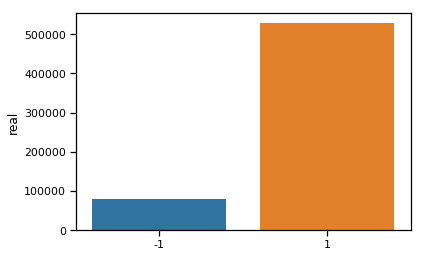

In [10]:
sns.barplot(x = [1,-1], y = Y['real'].value_counts())
plt.show()

In [11]:
# fake = review[review['real'] == -1]
# ft = ' '.join(text for text in review['review'])
# wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(ft)
# plt.figure(figsize=(15, 15))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off')
# plt.show()

# Some problem: Both word clouds are the same

In [12]:
# real = review[review['real'] == 1]
# rt = ' '.join(text for text in review['review'])
# wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(rt)
# plt.figure(figsize=(15, 15))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off')
# plt.show()

In [13]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [14]:
# Define function to preprocess text for a word2vec model
def cleanup_text_word2vec(docs, logging=False):
    sentences = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents" % (counter, len(docs)))
        # Disable tagger so that lemma_ of personal pronouns (I, me, etc) don't getted marked as "-PRON-"
        doc = nlp(doc, disable=['tagger'])
        # Grab lemmatized form of words and make lowercase
        doc = " ".join([tok.lemma_.lower() for tok in doc])
        # Split into sentences based on punctuation
        doc = re.split("[\.?!;] ", doc)
        # Remove commas, periods, and other punctuation (mostly commas)
        doc = [re.sub("[\.,;:!?]", "", sent) for sent in doc]
        # Split into words
        doc = [sent.split() for sent in doc]
        sentences += doc
        counter += 1
    return sentences

In [15]:
train_cleaned_word2vec = cleanup_text_word2vec(review['review'], logging=True)
print('Cleaned sentences: ', len(train_cleaned_word2vec))

Processed 1000 out of 608458 documents
Processed 2000 out of 608458 documents
Processed 3000 out of 608458 documents
Processed 4000 out of 608458 documents
Processed 5000 out of 608458 documents
Processed 6000 out of 608458 documents
Processed 7000 out of 608458 documents
Processed 8000 out of 608458 documents
Processed 9000 out of 608458 documents
Processed 10000 out of 608458 documents
Processed 11000 out of 608458 documents
Processed 12000 out of 608458 documents
Processed 13000 out of 608458 documents
Processed 14000 out of 608458 documents
Processed 15000 out of 608458 documents
Processed 16000 out of 608458 documents
Processed 17000 out of 608458 documents
Processed 18000 out of 608458 documents
Processed 19000 out of 608458 documents
Processed 20000 out of 608458 documents
Processed 21000 out of 608458 documents
Processed 22000 out of 608458 documents
Processed 23000 out of 608458 documents
Processed 24000 out of 608458 documents
Processed 25000 out of 608458 documents
Processed

Processed 203000 out of 608458 documents
Processed 204000 out of 608458 documents
Processed 205000 out of 608458 documents
Processed 206000 out of 608458 documents
Processed 207000 out of 608458 documents
Processed 208000 out of 608458 documents
Processed 209000 out of 608458 documents
Processed 210000 out of 608458 documents
Processed 211000 out of 608458 documents
Processed 212000 out of 608458 documents
Processed 213000 out of 608458 documents
Processed 214000 out of 608458 documents
Processed 215000 out of 608458 documents
Processed 216000 out of 608458 documents
Processed 217000 out of 608458 documents
Processed 218000 out of 608458 documents
Processed 219000 out of 608458 documents
Processed 220000 out of 608458 documents
Processed 221000 out of 608458 documents
Processed 222000 out of 608458 documents
Processed 223000 out of 608458 documents
Processed 224000 out of 608458 documents
Processed 225000 out of 608458 documents
Processed 226000 out of 608458 documents
Processed 227000

Processed 402000 out of 608458 documents
Processed 403000 out of 608458 documents
Processed 404000 out of 608458 documents
Processed 405000 out of 608458 documents
Processed 406000 out of 608458 documents
Processed 407000 out of 608458 documents
Processed 408000 out of 608458 documents
Processed 409000 out of 608458 documents
Processed 410000 out of 608458 documents
Processed 411000 out of 608458 documents
Processed 412000 out of 608458 documents
Processed 413000 out of 608458 documents
Processed 414000 out of 608458 documents
Processed 415000 out of 608458 documents
Processed 416000 out of 608458 documents
Processed 417000 out of 608458 documents
Processed 418000 out of 608458 documents
Processed 419000 out of 608458 documents
Processed 420000 out of 608458 documents
Processed 421000 out of 608458 documents
Processed 422000 out of 608458 documents
Processed 423000 out of 608458 documents
Processed 424000 out of 608458 documents
Processed 425000 out of 608458 documents
Processed 426000

In [ ]:
train_cleaned_word2vec.to_csv("E:\\Yelp\\Unfiltered Data\\YelpZip\\Customs\\train_cleaned_word2vec.csv", header = None)

# word2vec variables:
### size: Word vector dimensionality size is 300
### window: Maximum distance between center word and predicted word in a sentence
### min_count: Ignore all words that appear with less frequency than this
### workers: Use this many workers to train model. Leads to faster training on multi-core machines
### sg: Define archetecture. 1 for skip-gram, 0 for continouous bag of words (CBOW).

In [ ]:
from gensim.models.word2vec import Word2Vec

text_dim = 300
print("Training Word2Vec model...")
wordvec_model = Word2Vec(train_cleaned_word2vec, size=text_dim, window=5, min_count=3, workers=4, sg=1)
print("Word2Vec model created.")
print("%d unique words represented by %d dimensional vectors" % (len(wordvec_model.wv.vocab), text_dim))

In [ ]:
#Checking how our model has learned the laguage from reviews
print(wordvec_model.wv.most_similar(positive=['woman', 'king'], negative=['man']))
print(wordvec_model.wv.most_similar_cosmul(positive=['woman', 'king'], negative=['man']))
print(wordvec_model.wv.doesnt_match("breakfast cereal dinner lunch".split()))
print(wordvec_model.wv.similarity('woman', 'man'))
print(wordvec_model.wv.similarity('gruesome', 'terrify'))

In [ ]:
# Define function to create word vectors given a cleaned piece of text.
def create_average_vec(doc):
    average = np.zeros((text_dim,), dtype='float32')
    num_words = 0.
    for word in doc.split():
        if word in wordvec_model.wv.vocab:
            average = np.add(average, wordvec_model[word])
            num_words += 1.
    if num_words != 0.:
        average = np.divide(average, num_words)
    return average


In [ ]:
# Create word vectors
train_cleaned_vec = np.zeros((review.shape[0], text_dim), dtype="float32")  # 19579 x 300
for i in range(len(train_cleaned)):
    train_cleaned_vec[i] = create_average_vec(train_cleaned_word2vec[i]) #Or train cleaned

print("Train word vector shape:", train_cleaned_vec.shape)

In [ ]:
from sklearn.preprocessing import label_binarize

# Transform labels into one hot encoded format.
y = label_binarize(review['real'], classes=[1, -1])
print('y_train_ohe shape: {}'.format(y_train_ohe.shape))
print('y_train_ohe samples:')
print(y_train_ohe[:5])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(train_cleaned_vec, y, test_size=0.2, random_state = 21)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print('X_train size: {}'.format(X_train.shape))
print('X_test size: {}'.format(X_test.shape))
print('y_train size: {}'.format(y_train.shape))
print('y_test size: {}'.format(y_test.shape))

In [ ]:
#Building the neural network for training

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, LSTM, Embedding, Bidirectional, Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.optimizers import SGD

# Densely Connected Neural Network (Multi-Layer Perceptron)
model.add(Dense(512, activation='relu', kernel_initializer='he_normal', input_dim=300))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

# # LSTM network
# inputs = Input(shape=(300,1))
# x = Bidirectional(LSTM(64, return_sequences=True),merge_mode='concat')(inputs)
# x = Dropout(0.2)(x)
# x = Flatten()(x)
# outputs = Dense(3, activation='softmax')(x)
# model = Model(inputs=inputs, outputs=outputs, name='LSTM')

In [ ]:
model.summary()

In [ ]:
# Compile the model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Define number of epochs
epochs = 100

# Fit the model to the training data
estimator = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=128, verbose=1)

In [ ]:
print("Training accuracy: %.2f%% / Validation accuracy: %.2f%%" % 
      (100*estimator.history['acc'][-1], 100*estimator.history['val_acc'][-1]))

In [ ]:
# Plot model accuracy over epochs
plt.plot(estimator.history['acc'])
plt.plot(estimator.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Plot model loss over epochs
plt.plot(estimator.history['loss'])
plt.plot(estimator.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
# Make predictions
predicted_prob = model.predict(X_test)
print(predicted_prob.shape)

In [ ]:
# # Clean text before feeding it to spaCy
# punctuations = string.punctuation

# # Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
# def cleanup_text(docs, logging=False):
#     texts = []
#     counter = 1
#     for doc in docs:
#         if counter % 1000 == 0 and logging:
#             print("Processed %d out of %d documents." % (counter, len(docs)))
#         counter += 1
#         doc = nlp(doc, disable=['parser', 'ner'])
#         tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
#         tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
#         tokens = ' '.join(tokens)
#         texts.append(tokens)
#     return pd.Series(texts)

# # Cleanup text and make sure it retains original shape
# print('Original training data shape: ', train['Text'].shape)
# train_cleaned = cleanup_text(train['Text'], logging=True)
# print('Cleaned up training data shape: ', train_cleaned.shape)